In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x=[-0.3308, -0.3154, -0.2846, -0.23636, -0.1714, -0.0913, -0.0011, 0.0879, 0.1681, 0.2363, 0.2868, 0.3198, 0.3385]
# y=[0.1429, 0.1242, 0.0945, 0.0582, 0.0220, -0.0055, -0.0165, -0.0088, 0.0154, 0.0505, 0.0879, 0.1198, 0.1407]
# dt=0.05

# df = pd.DataFrame({'x': x, 
#                    'y': y, 
#                    't': [np.round(dt*i, 5) for i in range(len(x))],
#                   })
# df.to_csv('mesure-pendule.csv', index=False)

## Paramètres et Mesures

In [3]:
# params

# constante gravitationelle
g = 9.81  # m/s²

# masse
m = 0.024 # kg

# mesures
df_mesure = pd.read_csv('mesure-pendule.csv')
df_mesure

,x,y,t
0,-0.33080,0.1429,0.00
1,-0.31540,0.1242,0.05
2,-0.28460,0.0945,0.10
3,-0.23636,0.0582,0.15
4,-0.17140,0.0220,0.20
5,-0.09130,-0.0055,0.25
6,-0.00110,-0.0165,0.30
7,0.08790,-0.0088,0.35
8,0.16810,0.0154,0.40
9,0.23630,0.0505,0.45


## Recalcul vitesse et accélération
+ A partir de mesure

In [4]:
arr = df_mesure.to_dict(orient="records")

# vecteurs x et y
x = list(df_mesure["x"])
y = list(df_mesure["y"])

# x/y min/max
x_max = df_mesure["x"].max()
x_min = df_mesure["x"].min()
y_max = df_mesure["y"].max()
y_min = df_mesure["y"].min()

# pas de temps
t = list(df_mesure["t"])
dt = int(1000 * (t[1] - t[0])) / 1000


# vitesses
for i, e in enumerate(arr):
    e["k"] = i
    # poids
    e["px"] = 0
    e["py"] = -m * g
    if not i in [0, len(arr)-1]:
        # différence avec point précédent P
        vx_1 = (arr[i]['x'] - arr[i-1]['x'])/dt
        vy_1 = (arr[i]['y'] - arr[i-1]['y'])/dt
        
        # différence avec point suivant S
        vx_2 = (arr[i+1]['x'] - arr[i]['x'])/dt
        vy_2 = (arr[i+1]['y'] - arr[i]['y'])/dt
        
        # vitesse = moyenne entre points P et S 
        e["vx"] = (vx_1+vx_2) / 2
        e["vy"] = (vy_1+vy_2) / 2

        # accélération = différence de vitesse entre P et S divisé par dt
        e["ax"] = (vx_2-vx_1) / dt
        e["ay"] = (vy_2-vy_1) / dt
    
        # tension fil = t = ma-p selon loi somme des forces = poids pendule + tension fil = masse x accélération
        e["tx"] = m * e["ax"] - e["px"]
        e["ty"] = m * e["ay"] - e["py"]
        
    else:
        # on sait qu'à t=0 le pendule est immobile
        # idem pour le dernier point car il est quasi symétrique
        e["vx"] = 0
        e["vy"] = 0
        
df2 = pd.DataFrame(arr)
arr2 = df2.to_dict(orient="records")
df2

,x,y,t,k,px,py,vx,vy,ax,ay,tx,ty
0,-0.33080,0.1429,0.00,0,0,-0.23544,0.0000,0.000,NaN,NaN,NaN,NaN
1,-0.31540,0.1242,0.05,1,0,-0.23544,0.4620,-0.484,6.160,-4.40,0.147840,0.12984
2,-0.28460,0.0945,0.10,2,0,-0.23544,0.7904,-0.660,6.976,-2.64,0.167424,0.17208
3,-0.23636,0.0582,0.15,3,0,-0.23544,1.1320,-0.725,6.688,0.04,0.160512,0.23640
4,-0.17140,0.0220,0.20,4,0,-0.23544,1.4506,-0.637,6.056,3.48,0.145344,0.31896
5,-0.09130,-0.0055,0.25,5,0,-0.23544,1.7030,-0.385,4.040,6.60,0.096960,0.39384
6,-0.00110,-0.0165,0.30,6,0,-0.23544,1.7920,-0.033,-0.480,7.48,-0.011520,0.41496
7,0.08790,-0.0088,0.35,7,0,-0.23544,1.6920,0.319,-3.520,6.60,-0.084480,0.39384
8,0.16810,0.0154,0.40,8,0,-0.23544,1.4840,0.593,-4.800,4.36,-0.115200,0.34008
9,0.23630,0.0505,0.45,9,0,-0.23544,1.1870,0.725,-7.080,0.92,-0.169920,0.25752


## Affichage force et accélération/masse

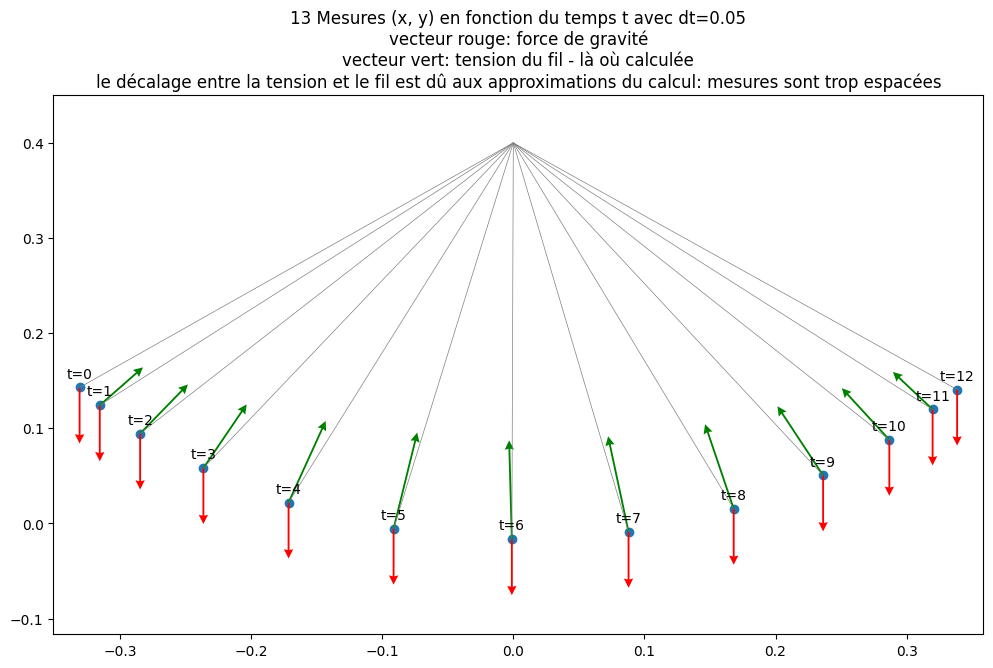

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))
title = f"{len(arr)} Mesures (x, y) en fonction du temps t avec dt={dt}"
title += "\nvecteur rouge: force de gravité"
title += "\nvecteur vert: tension du fil - là où calculée"
title += "\nle décalage entre la tension et le fil est dû aux approximations du calcul: mesures sont trop espacées"
ax.set_title(title)

x_extra = 0.02
y_extra = 0.1
ax.set_xlim([x_min - x_extra, x_max + x_extra])
ax.set_ylim([y_min - y_extra, 0.45])

ax.scatter(x, y)

echel = 4

for e in arr2:
    k = e["k"]
    ax.annotate(f"t={k}", xy=(x[k], y[k]), xytext=(x[k], y[k] + 0.01), ha="center")
    ax.plot([0, x[k]], [0.4, y[k]],lw=0.5,color='grey')
    ax.quiver(
            x[k],
            y[k],
            e['px'] /echel,
            e['py'] / echel,
            color="r",
            width=0.002,
            headwidth=5,
            scale_units="xy",
            scale=1,
        )
    ax.quiver(
            x[k],
            y[k],
            e['tx'] /echel,
            e['ty'] / echel,
            color="g",
            width=0.002,
            headwidth=5,
            scale_units="xy",
            scale=1,
        )


plt.show()